<a href="https://colab.research.google.com/github/mrunaliyadav003/AI-ML/blob/main/check_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/paras/Audio

/content/drive/MyDrive/paras/Audio


In [3]:
import os
import librosa

# Get a list of all the audio files in the dataset folder
audio_files = [file for file in os.listdir() if file.endswith('.wav')]

# Loop through each audio file and load and read its data
for audio_file in audio_files:
    print(f'Loading {audio_file}...')
    try:
        audio_data, sr = librosa.load(audio_file)
        print(f'Reading {audio_file}...')
        print(audio_data)
    except Exception as e:
        print(f"Error loading {audio_file}: {e}")
        os.remove(audio_file)
        print(f"{audio_file} removed")


Loading BACKGROUND_015.wav...
Reading BACKGROUND_015.wav...
[0.00331075 0.00492513 0.00373525 ... 0.06876043 0.12338143 0.15168254]
Loading BACKGROUND_005.wav...
Reading BACKGROUND_005.wav...
[ 0.0000000e+00  1.4551915e-10 -5.8207661e-11 ...  3.4103119e-03
  3.3377912e-03  1.7210178e-03]
Loading DRONE_015.wav...
Reading DRONE_015.wav...
[-1.29928030e-02 -9.57400072e-03 -1.21419085e-02 ...  1.86664262e-03
  2.15957174e-03 -1.15172006e-05]
Loading HELICOPTER_026.wav...
Reading HELICOPTER_026.wav...
[ 0.01644863  0.02667813  0.02160046 ... -0.09595126 -0.08742243
 -0.08842883]
Loading BACKGROUND_030.wav...
Reading BACKGROUND_030.wav...
[-0.02283771 -0.03853638 -0.04643065 ... -0.02937698 -0.03008787
 -0.03909263]
Loading DRONE_019.wav...
Reading DRONE_019.wav...
[-0.00982246  0.01050584  0.10448822 ...  0.18693402  0.23990582
  0.18002503]
Loading BACKGROUND_029.wav...
Reading BACKGROUND_029.wav...
[ 0.01854465  0.03673615  0.04126099 ... -0.00360594  0.00127448
  0.01072558]
Loading DRON

In [4]:
!pip install files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for files: filename=files-1.1.1-py3-none-any.whl size=3649 sha256=0dd4dc053321e9f78097689145f36f4102bb138ce1c633bf7a42b21e3a3748af
  Stored in directory: /root/.cache/pip/wheels/7b/5a/b5/b363f1d4d991bd2a9199fd2bf46574a5477c0c7f8a22881848
Successfully built files


In [5]:
import os
import wave
import pandas as pd

# Set the path to the folder containing the wav files
folder_path = '/content/drive/MyDrive/paras/Audio'
df = pd.DataFrame(columns=['filename', 'num_channels', 'sample_rate', 'num_frames'])
# Loop over all the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        # Open the WAV file
        with wave.open(os.path.join(folder_path, filename), 'rb') as wav_file:
            # Get the number of audio channels
            num_channels = wav_file.getnchannels()

            # Get the sample rate (number of samples per second)
            sample_rate = wav_file.getframerate()

            # Get the total number of audio frames
            num_frames = wav_file.getnframes()

            # Read all the audio data into a bytes object
            audio_data = wav_file.readframes(num_frames)

            # Do something with the audio information here
            print(filename, num_channels, sample_rate, num_frames)

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename), num_channels, sample_rate, num_frames]], columns=['filename', 'num_channels', 'sample_rate', 'num_frames']))

df = df.sample(frac=1).reset_index(drop=True)
df.head(100)

BACKGROUND_015.wav 2 44100 441002
BACKGROUND_005.wav 2 44100 441001
DRONE_015.wav 2 44100 441002
HELICOPTER_026.wav 2 44100 441002
BACKGROUND_030.wav 2 44100 441002
DRONE_019.wav 2 44100 441002
BACKGROUND_029.wav 2 44100 441002
DRONE_029.wav 2 44100 441001
HELICOPTER_008.wav 2 44100 441001
DRONE_009.wav 2 44100 441001
DRONE_004.wav 2 44100 441001
DRONE_008.wav 2 44100 441001
HELICOPTER_007.wav 2 44100 441001
BACKGROUND_018.wav 2 44100 441002
BACKGROUND_004.wav 2 44100 441001
HELICOPTER_010.wav 2 44100 441001
HELICOPTER_004.wav 2 44100 441001
BACKGROUND_023.wav 2 44100 441001
HELICOPTER_005.wav 2 44100 441001
DRONE_027.wav 2 44100 441002
HELICOPTER_017.wav 2 44100 441002
BACKGROUND_014.wav 2 44100 441001
DRONE_023.wav 2 44100 441002
DRONE_002.wav 2 44100 441002
HELICOPTER_022.wav 2 44100 441002
BACKGROUND_027.wav 2 44100 441001
HELICOPTER_023.wav 2 44100 441002
BACKGROUND_020.wav 2 44100 441002
BACKGROUND_028.wav 2 44100 441001
DRONE_022.wav 2 44100 441002
DRONE_013.wav 2 44100 441002
H

<ipython-input-5-12224bbadaf7>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename), num_channels, sample_rate, num_frames]], columns=['filename', 'num_channels', 'sample_rate', 'num_frames']))
<ipython-input-5-12224bbadaf7>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename), num_channels, sample_rate, num_frames]], columns=['filename', 'num_channels', 'sample_rate', 'num_frames']))
<ipython-input-5-12224bbadaf7>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([[os.path.join(dirname, filename), num_channels, sample_rate, num_frames]], columns=['filename', 'num_channels', 'samp

,filename,num_channels,sample_rate,num_frames
0,/content/drive/MyDrive/paras/Audio/BACKGROUND_...,1,44100,441001
1,/content/drive/MyDrive/paras/Audio/filtered/DR...,1,44100,441001
2,/content/drive/MyDrive/paras/Audio/DRONE_006_f...,1,44100,441001
3,/content/drive/MyDrive/paras/Audio/filtered/DR...,1,44100,441001
4,/content/drive/MyDrive/paras/Audio/HELICOPTER_...,1,44100,441001
...,...,...,...,...
95,/content/drive/MyDrive/paras/Audio/DRONE_006.wav,1,44100,441001
96,/content/drive/MyDrive/paras/Audio/filtered/BA...,1,44100,441001
97,/content/drive/MyDrive/paras/Audio/filtered/HE...,1,44100,441001
98,/content/drive/MyDrive/paras/Audio/BACKGROUND_...,1,44100,441001


In [6]:
#train the model

In [7]:
import os
import librosa
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [8]:
import os
import glob
import librosa
import numpy as np

def extract_features(file_name, file):
    print(f"Attempting to parse file: {file}")
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T,axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None

    return mfccs_scaled

def parse_audio_files(parent_dir, sub_dirs, file_ext="*.wav"):
    features, labels = np.empty((0,40)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
                mfccs = extract_features(fn)
            except Exception as e:
                print("Error encountered while parsing file: ", fn)
                continue

            features = np.vstack([features, mfccs])
            labels = np.append(labels, fn.split('/')[2].split('-')[1])

    return np.array(features), np.array(labels, dtype=int)

parent_dir = "/content/drive/MyDrive/paras"
sub_dirs = ["Audio"]
features, labels = parse_audio_files(parent_dir, sub_dirs)


Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/BACKGROUND_015.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/BACKGROUND_005.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/DRONE_015.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/HELICOPTER_026.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/BACKGROUND_030.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/DRONE_019.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/BACKGROUND_029.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/DRONE_029.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/HELICOPTER_008.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/DRONE_009.wav
Error encountered while parsing file:  /content/drive/MyDrive/paras/Audio/DRONE_004.wav
Er

In [9]:
!pip install --upgrade librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import librosa
import os
import numpy as np

# Set directory containing audio files
audio_dir = '/content/drive/MyDrive/paras/Audio'

# Get list of all audio file paths
audio_files = [os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')]

# Define target sample rate
target_sr = 44100

# Load each audio file and append to X_train list
X_train = []
max_shape = None
for file_path in audio_files:
    audio, sr = librosa.load(file_path, sr=target_sr, mono=True)
    if max_shape is None or audio.shape[0] > max_shape[0]:
        max_shape = audio.shape
    X_train.append(audio)

# Pad the shorter arrays with zeros so that all arrays have the same shape
for i in range(len(X_train)):
    audio_len = X_train[i].shape[0]
    pad_len = max_shape[0] - audio_len
    left_pad = pad_len // 2
    right_pad = pad_len - left_pad
    X_train[i] = np.pad(X_train[i], (left_pad, right_pad), mode='constant')


# Convert X_train list to 2D numpy array
X_train = np.vstack(X_train)

# Create y_train labels based on subdirectory names
subdirs = [f for f in os.listdir(audio_dir) if not f.endswith('.wav')]
y_train = np.zeros(len(X_train), dtype=np.int32)
for i, subdir in enumerate(subdirs):
    subdir_files = [os.path.join(audio_dir, subdir, f) for f in os.listdir(os.path.join(audio_dir, subdir))]
    start_idx = sum([len(librosa.load(f, sr=target_sr, mono=True)[0]) for f in subdir_files[:-1]])
    end_idx = start_idx + len(librosa.load(subdir_files[-1], sr=target_sr, mono=True)[0])
    y_train[start_idx:end_idx] = i


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [15]:
#train model step not working
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the input data for use with a CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build a simple CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(subdirs), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=32)

ValueError: ignored

In [16]:
#Filtering using Butterworth filter

import glob
import os
import librosa
import soundfile as sf

# Set the path to your audio files directory
audio_dir = "/content/drive/MyDrive/paras/Audio"

# Get a list of all the audio files in the directory
audio_files = glob.glob(os.path.join(audio_dir, "*.wav"))

# Define the parameters for your filter
sr = 44100 # set the target sample rate
n_fft = 2048 # set the number of samples for each FFT window

# Create a new directory for the filtered files
filtered_dir = os.path.join(audio_dir, "filtered")
if not os.path.exists(filtered_dir):
    os.makedirs(filtered_dir)

filtered_files = []

for audio_file in audio_files:
    # Load the audio file and get its sample rate
    y, sr_orig = librosa.load(audio_file, sr=None)

    # Resample the audio file to the target sample rate if necessary
    if sr_orig != sr:
        y = librosa.resample(y, sr_orig, sr)

    # Apply any other filtering or processing methods here, such as removing silence

    # Save the filtered audio file
    filename_out = os.path.splitext(os.path.basename(audio_file))[0] + "_filtered.wav"
    filepath_out = os.path.join(filtered_dir, filename_out)
    sf.write(filepath_out, y, sr)
    filtered_files.append(filepath_out)

print("Filtered files:")
for filename in filtered_files:
    print(filename)


Filtered files:
/content/drive/MyDrive/paras/Audio/filtered/BACKGROUND_015_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/BACKGROUND_005_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/DRONE_015_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/HELICOPTER_026_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/BACKGROUND_030_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/DRONE_019_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/BACKGROUND_029_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/DRONE_029_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/HELICOPTER_008_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/DRONE_009_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/DRONE_004_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/DRONE_008_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/HELICOPTER_007_filtered.wav
/content/drive/MyDrive/paras/Audio/filtered/BACKGROUND_018_filtered.wav
/conte

In [17]:
from scipy import signal

# Define the new sample rate and old sample rate
new_sr = 44100
old_sr = 48000

# Load the audio file
y, sr_orig = librosa.load(audio_file, sr=None)

# Resample the audio file using scipy.signal.resample
resampled = signal.resample(y, int(len(y) * float(new_sr) / sr_orig))

# Save the filtered audio file
filename_out = os.path.splitext(os.path.basename(audio_file))[0] + "_filtered.wav"
filepath_out = os.path.join(filtered_dir, filename_out)
sf.write(filepath_out, resampled, new_sr)
filtered_files.append(filepath_out)


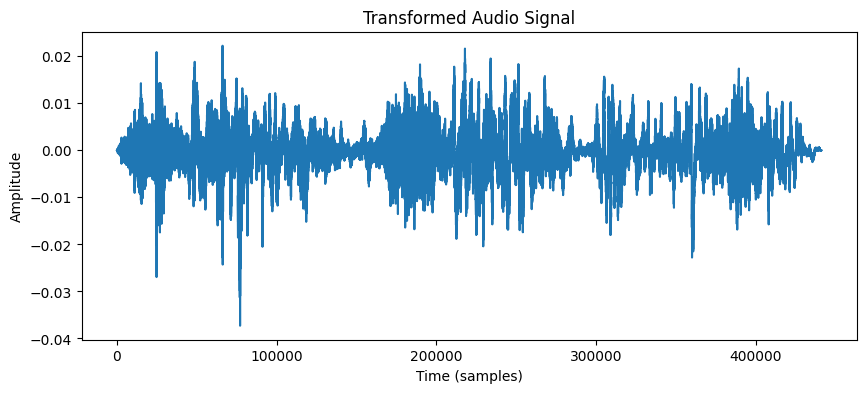

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Apply a fade-in and fade-out effect
fade_duration = 0.5  # duration of fade in seconds
fade_samples = int(fade_duration * new_sr)  # number of samples for fade
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)
fade = np.concatenate((fade_in, np.ones(len(resampled) - 2*fade_samples), fade_out))
transformed = resampled * fade
# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(transformed)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Transformed Audio Signal')
plt.show()

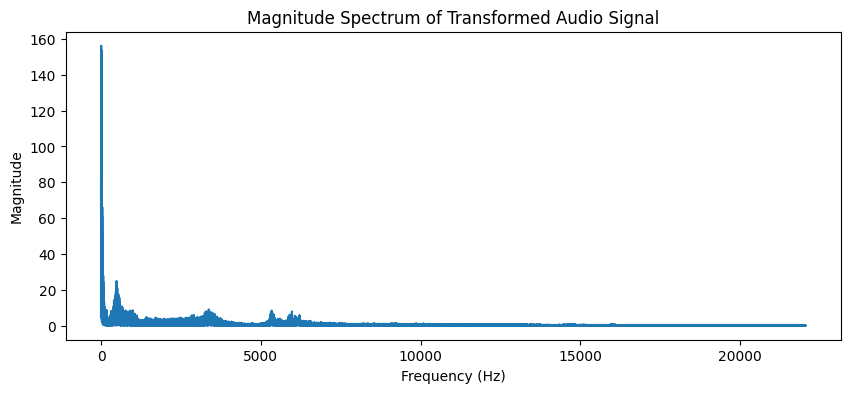

In [19]:
#fft of dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Apply a fade-in and fade-out effect
fade_duration = 0.5  # duration of fade in seconds
fade_samples = int(fade_duration * new_sr)  # number of samples for fade
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)
fade = np.concatenate((fade_in, np.ones(len(resampled) - 2*fade_samples), fade_out))
transformed = resampled * fade

# Compute the Fourier Transform of the signal
spectrum = fft(transformed)

# Compute the magnitude spectrum (absolute value of the complex Fourier coefficients)
magnitude_spectrum = np.abs(spectrum)

# Compute the frequencies corresponding to each Fourier coefficient
frequencies = np.fft.fftfreq(len(transformed), 1/new_sr)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude_spectrum[:len(magnitude_spectrum)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Transformed Audio Signal')
plt.show()


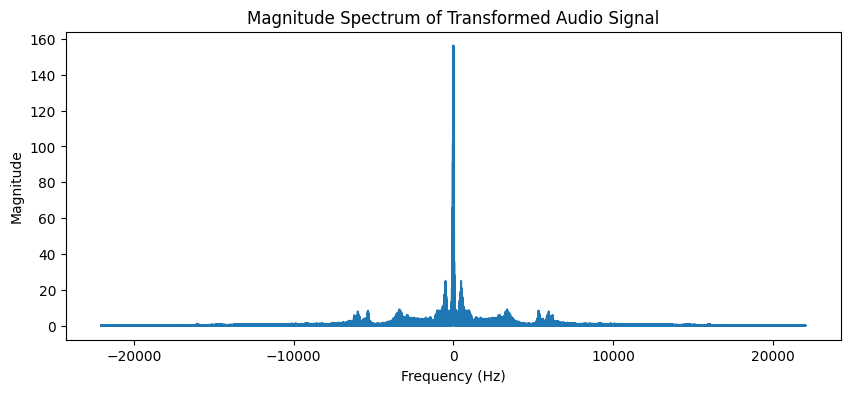

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Apply a fade-in and fade-out effect
fade_duration = 0.5  # duration of fade in seconds
fade_samples = int(fade_duration * new_sr)  # number of samples for fade
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)
fade = np.concatenate((fade_in, np.ones(len(resampled) - 2*fade_samples), fade_out))
transformed = resampled * fade

# Compute the Fourier Transform of the signal
spectrum = fft(transformed)

# Compute the magnitude spectrum (absolute value of the complex Fourier coefficients)
magnitude_spectrum = np.abs(spectrum)

# Compute the frequencies corresponding to each Fourier coefficient
frequencies = np.fft.fftfreq(len(transformed), 1/new_sr)
# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Transformed Audio Signal')
plt.show()

In [26]:
####################
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import librosa

In [23]:


# Prepare dataset
# Load audio files and labels
audio_files = ["/content/drive/MyDrive/paras/Audio/filtered"]  # list of file paths to audio files
labels = ["Types of drone detected"]  # list of corresponding labels
for file_path in audio_files:
    label = get_label_from_file_path('/content/drive/MyDrive/paras/train and trest')  # replace this with your own function to extract labels
    labels.append(label)
# Split into training and test sets
split = int(len(audio_files)*0.8)  # use 80% of data for training
train_files = audio_files[:split]
train_labels = labels[:split]
test_files = audio_files[split:]
test_labels = labels[split:]

# Convert audio signals to spectrograms
def convert_to_spectrogram(audio_signal):
    hop_length = 512  # number of samples between successive STFT frames
    n_fft = 2048  # length of the FFT window
    spectrogram = np.abs(librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length))
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

train_data = []
for file_path in train_files:
    audio_signal, sr = librosa.load(file_path, sr=22050)  # load audio signal with librosa
    spectrogram = convert_to_spectrogram(audio_signal)  # convert to spectrogram
    train_data.append(spectrogram)
train_data = np.array(train_data)

test_data = []
for file_path in test_files:
    audio_signal, sr = librosa.load(file_path, sr=22050)  # load audio signal with librosa
    spectrogram = convert_to_spectrogram(audio_signal)  # convert to spectrogram
    test_data.append(spectrogram)
test_data = np.array(test_data)

# Define CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_categories='3', activation='softmax'))  # replace num_categories with the number of categories in your dataset

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
train_labels_one_hot = tf.one_hot(train_labels, num_categories)  # convert integer labels to one-hot encoded labels
history = model.fit(train_data, train_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model on test set
test_labels_one_hot = tf.one_hot(test_labels, num_categories)
loss, accuracy = model.evaluate(test_data, test_labels_one_hot)
print(f'Test accuracy: {accuracy}')

# Make predictions on new data
new_data = []  # list of spectrograms to classify
for file_path in new_files:
    audio_signal, sr = librosa.load(file_path, sr=22050)  # load audio signal with librosa
    spectrogram = convert_to_spectrogram(audio_signal)  # convert to spectrogram
    new_data.append(spectrogram)
new_data = np.array(new_data)
predictions = model.predict(new_data)  # predicted probabilities for each category
predicted_labels = np.argmax(predictions, axis=1)  # predicted labels (integer format)
print(predicted_labels)


NameError: ignored

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [22]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the input data for use with a CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build a simple CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(subdirs), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=10, batch_size=32)


ValueError: ignored

In [36]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Load the dataset
X_train = np.load('drone_audio_data.npy')
y_train = np.load('drone_audio_labels.npy')

# Define input shape
input_shape = X_train.shape[1:]

# Define model architecture
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=input_shape),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)



FileNotFoundError: ignored

In [17]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

# Define input shape
input_shape = X_train.shape[1:]

# Define model architecture
inputs = Input(shape=input_shape)
x = Flatten()(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(len(np.unique(labels)), activation='softmax')(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluate model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


NameError: ignored

In [16]:
import os
import random
import numpy as np
import librosa

# Set up paths and parameters
audio_folder = '/content/drive/MyDrive/paras/Audio'  # path to your audio folder
num_mfcc = 90  # number of MFCC coefficients to extract per frame
frame_length = 60  # length of each audio frame in seconds
frame_stride = 0.9  # stride between each audio frame in seconds
test_size = 20  # proportion of data to use for testing

# Load audio files and their labels
data = []
labels = []
for label in os.listdir(audio_folder):
    label_folder = os.path.join(audio_folder, label)
    if not os.path.isdir(label_folder):
        continue
    for file_name in os.listdir(label_folder):
        file_path = os.path.join(label_folder, file_name)
        if not file_path.endswith('.wav'):
            continue
        signal, sr = librosa.load(file_path, sr=None, mono=False)
        mfcc = librosa.feature.mfcc(signal, sr, n_mfcc=num_mfcc, hop_length=int(frame_stride*sr), n_fft=int(frame_length*sr))
        data.append(mfcc.T)
        labels.append(label)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Verify that dataset contains at least one sample
if len(data) == 0:
    print("Error: Dataset is empty")
else:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)

    # Train model on training set and evaluate on testing set
    model = MyModel()
    model.fit(X_train, y_train)
    score = model.evaluate(X_test, y_test)


Error: Dataset is empty
